# Overview of PyLandStats

In [1]:
import pylandstats as pls

## Landscape analysis

We can load our landscape from a GeoTiff. We will use an extract of the Canton of Vaud (Switerland) derived from the [CORINE Land Cover dataset](https://land.copernicus.eu/pan-european/corine-land-cover) of the year 2000.

In [2]:
ls = pls.read_geotiff('data/vaud_g100_clc00_V18_5.tif')

For simplicity, it has been reclassified to show only *urban* (1) and *non-urban* (2) land cover classes

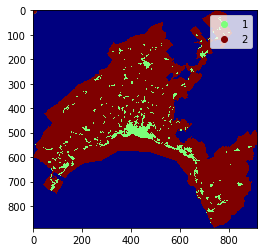

In [3]:
ls.plot_landscape(legend=True)

### Computing metrics

The metrics can be computed at the patch, class and landscape level

#### Patch-level metrics

The metrics can be computed at the patch level, that is, for each patch of the landscape:

In [4]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,115.0,10600.0,92.173913,2.409091,1.129654,1431.782106
1,1,13.0,2600.0,200.000000,1.625000,1.100096,223.606798
2,1,2.0,600.0,300.000000,1.000000,1.011893,223.606798
3,1,69.0,6000.0,86.956522,1.764706,1.087917,316.227766
4,1,76.0,8800.0,115.789474,2.444444,1.136721,316.227766
5,1,50.0,4600.0,92.000000,1.533333,1.074123,1236.931688
6,1,26.0,3200.0,123.076923,1.454545,1.072245,1526.433752
7,1,43.0,5000.0,116.279070,1.785714,1.099468,316.227766
8,1,1.0,400.0,400.000000,1.000000,1.000000,1769.180601


We can operate upon `patch_metrics_df` as with any other pandas DataFrame. In this case, there are 206 patches, of which 193 are *urban* and 13 *non-urban*, as noted respectively by the values of 1 and 2 within the `class_val` column:

In [5]:
patch_metrics_df['class_val'].value_counts()

1    193
2     13
Name: class_val, dtype: int64

We might also use methods from other libraries, such as matplotlib or numpy. For instance, in order to explore the size distribution of patches, we can also plot the distribution of the logarithm of `area` for *urban* and *non-urban* classes as follows:

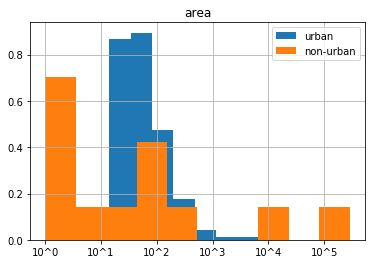

In [6]:
import matplotlib as mpl
import numpy as np

ax = patch_metrics_df[patch_metrics_df['class_val'] == 1].apply(np.log10).hist(
    column='area', label='urban', density=True)
ax = patch_metrics_df[patch_metrics_df['class_val'] == 2].apply(np.log10).hist(
    column='area', ax=ax, label='non-urban', density=True)

ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: '10^%d' % x))
ax[0].legend()

#### Class-level metrics

The metrics can also be computed at the class level, that is, aggregating over all patches of a land use/cover class

<a id='class-metrics-df'></a>

In [7]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,24729.0,7.701939,193,0.060111,2.069921,1431600.0,4.458771,22.949206,128.129534,2201.712038,...,1.081665,0.200096,0.035772,3.298134,1023.354950,707.998485,781.024968,6772.087205,879.913199,85.983187
2,296346.0,92.298061,13,0.004049,89.451374,1431600.0,4.458771,10.053260,22795.846154,278596.402199,...,1.069990,0.206571,0.056823,5.322120,246.645899,202.442542,223.606798,116.227766,38.386100,15.563243


#### Landscape-level metrics

Finally, the metrics can also be computed at the landscape level, that is, aggregating over all patches of the landscape

In [8]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,shannon_diversity_index
0,321075.0,206,0.064159,89.451374,1431600.0,4.458771,9.716931,1558.616505,257308.652318,43.0,...,0.206571,0.037678,3.477259,974.33933,241.380151,700.0,6772.087205,872.438139,89.541509,0.271429


### Choosing your metrics

You can see all the implemented metrics through the following constants defined at the `Landscape` class:

<a id='available-metrics'></a>

In [9]:
pls.Landscape.PATCH_METRICS, pls.Landscape.CLASS_METRICS, pls.Landscape.LANDSCAPE_METRICS

(['area',
  'perimeter',
  'perimeter_area_ratio',
  'shape_index',
  'fractal_dimension',
  'euclidean_nearest_neighbor'],
 ['total_area',
  'proportion_of_landscape',
  'number_of_patches',
  'patch_density',
  'largest_patch_index',
  'total_edge',
  'edge_density',
  'landscape_shape_index',
  'area_mn',
  'area_am',
  'area_md',
  'area_ra',
  'area_sd',
  'area_cv',
  'perimeter_area_ratio_mn',
  'perimeter_area_ratio_am',
  'perimeter_area_ratio_md',
  'perimeter_area_ratio_ra',
  'perimeter_area_ratio_sd',
  'perimeter_area_ratio_cv',
  'shape_index_mn',
  'shape_index_am',
  'shape_index_md',
  'shape_index_ra',
  'shape_index_sd',
  'shape_index_cv',
  'fractal_dimension_mn',
  'fractal_dimension_am',
  'fractal_dimension_md',
  'fractal_dimension_ra',
  'fractal_dimension_sd',
  'fractal_dimension_cv',
  'euclidean_nearest_neighbor_mn',
  'euclidean_nearest_neighbor_am',
  'euclidean_nearest_neighbor_md',
  'euclidean_nearest_neighbor_ra',
  'euclidean_nearest_neighbor_sd',


The names above appear in snake-case since they correspond to the methods that compute them, implemented within the `Landscape` class. If you are only interested in a subset of the metrics above, you can specify it in each respective method, that is, `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df`. For instance:

<a id='subset-class-metrics-df'></a>

In [10]:
subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=['proportion_of_landscape', 'edge_density'])
subset_class_metrics_df

,proportion_of_landscape,edge_density
class_val,,
1,7.701939,4.458771
2,92.298061,4.458771


#### Documentation about the metrics

Each method is documented to provide a description of its arguments as well as information concerning its respective metric, e.g.:

In [11]:
help(pls.Landscape.edge_density)

Help on function edge_density in module pylandstats.landscape:

edge_density(self, class_val=None, count_boundary=False, hectares=True)
    Measure of edge length per area unit, which facilitates comparison
    among landscapes of different sizes (of a particular class if provided,
    otherwise for the whole landscape)
    
    Parameters
    ----------
    class_val : int, optional
        If provided, the metric will be computed at the level of the
        corresponding class, otherwise it will be computed at the
        landscape level
    count_boundary : bool, default False
        Whether the boundary of the landscape should be considered
    hectares : bool, default True
        Whether the landscape area should be converted to hectares (tends
        to yield more legible values for the metric)
    
    Returns
    -------
    ed : float
        ed >= 0, without limit ; ed equals 0 when the entire landscape and
        its border consist of the corresponding patch class.
     

#### Custom metric arguments

The default arguments correspond to how the metrics are defined within FRAGSTATS. Nevertheless, some metrics allow some variations in their definition. For instance, the `edge_density` above allows us to choose whether we consider the landscape boundary to be an edge (by default, as in FRAGSTATS, we do not, since we only consider edges between land use/cover classes), or whether we want the area to be converted to hectares (by default, as in FRAGSTATS, we do).

In [12]:
print("Edge density (without boundary, meters of edge per hectare):\n{}\n".format(
    ls.edge_density()))
print("Edge density (with boundary, meters of edge per hectare):\n{}\n".format(
    ls.edge_density(count_boundary=True)))
print("Edge density (with boundary, meters of edge per square meter):\n{}".format(
    ls.edge_density(count_boundary=True, hectares=False)))

Edge density (without boundary, meters of edge per hectare):
4.4587713151132915

Edge density (with boundary, meters of edge per hectare):
6.863816865218407

Edge density (with boundary, meters of edge per square meter):
0.0006863816865218407


For more details, see the documentation for each metric's method.

If we want to obtain a patch, class or landscape-level DataFrame with some customized metrics, instead of manually calling each metric's method with its respective parameters, we can use the `metrics_kws` argument of the `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df` to set the keyword arguments to be passed to the some metric methods. For instance, if we wanted `proportion_of_landscape` as a fraction instead of a percentage and `edge_density` to include the boundary, we can do it as follows:

In [13]:
custom_class_metrics_df = ls.compute_class_metrics_df(
    metrics_kws={
        'proportion_of_landscape': {'percent': False},
        'edge_density': {'count_boundary': True}
    })
custom_class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,24729.0,0.077019,193,0.060111,2.069921,1431600.0,4.502998,22.949206,128.129534,2201.712038,...,1.081665,0.200096,0.035772,3.298134,1023.354950,707.998485,781.024968,6772.087205,879.913199,85.983187
2,296346.0,0.922981,13,0.004049,89.451374,1431600.0,6.819590,10.053260,22795.846154,278596.402199,...,1.069990,0.206571,0.056823,5.322120,246.645899,202.442542,223.606798,116.227766,38.386100,15.563243


Note that the values for `proportion_of_landscape` and `edge_density` are different now than when we computed them with the default arguments for their respective methods (in the [class_metrics_df](#class-metrics-df) and [subset_class_metrics_df](#subset-class-metrics-df) above).

Note also that the `custom_class_metrics_df` does not only feature `proportion_of_landscape` and `edge_density` but features all the available metrics instead. This is because the `metrics_kws` argument does not imply that only the the metrics defined on it will be computed, only that the metrics defined on it will be computed with the specified arguments.

We might choose to only compute a reduced set of metrics, some of which with non-default arguments, by setting both the `metrics` and `metric_kws` arguments:

In [14]:
custom_subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'],
    metrics_kws={
        'proportion_of_landscape': {'percent': False}, 
        'edge_density': {'count_boundary': True}
    })
custom_subset_class_metrics_df

,proportion_of_landscape,edge_density,fractal_dimension_am
class_val,,,
1,0.077019,4.502998,1.129561
2,0.922981,6.819590,1.204003


The same could be done for the `Landscape.compute_patch_metrics_df` or `Landscape.compute_landscape_metrics_df` methods. Check the documentation of each metric's method for more details on how they might be customized through their arguments.

## Spatio-temporal analysis

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To this end, we can use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In this case, we will use the three extracts of the Canton of Vaud from the [CORINE Land Cover datasets](https://land.copernicus.eu/pan-european/corine-land-cover) for the years 2000, 2006 and 2012.

In [15]:
input_fnames = [
    'data/vaud_g100_clc00_V18_5.tif',
    'data/vaud_g100_clc06_V18_5a.tif',
    'data/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_fnames, dates=[2000, 2006, 2012])

### Spatio-temporal DataFrames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which are available as [properties](https://docs.python.org/3/howto/descriptor.html#properties) of our `SpatioTemporalAnalysis` instance. For instance, a DataFrame of the class-level metrics can be obtained as follows:

In [16]:
sta.class_metrics_df

metric         total_area proportion_of_landscape number_of_patches  \
class_val date                                                        
1         2000      24729                 7.70194               193   
          2006      24599                 7.66145               200   
          2012      24766                 7.71346               201   
2         2000     296346                 92.2981                13   
          2006     296476                 92.3386                 8   
          2012     296309                 92.2865                 8   

metric         patch_density largest_patch_index  total_edge edge_density  \
class_val date                                                              
1         2000     0.0601106             2.06992  1.4316e+06      4.45877   
          2006     0.0622907             2.02227   1.436e+06      4.47248   
          2012     0.0626022             2.02227  1.4459e+06      4.50331   
2         2000     0.0040489             89.4514  1.4316e+06      4.45877   
          2006    0.00249163             89.1318   1.436e+06      4.47248   
          2012    0.00249163             89.0916  1.4459e+06      4.50331   

metric         landscape_shape_index  area_mn  area_am  \
class_val date                                           
1         2000               22.9492   128.13  2201.71   
          2006               23.0892  122.995  2031.22   
          2012                23.181  123.214  2019.46   
2         2000               10.0533  22795.8   278596   
          2006               10.0744  37059.5   276495   
          2012               10.1175  37038.6   276399   

metric                      ...              fractal_dimension_md  \
class_val date              ...                                     
1         2000              ...                           1.08167   
          2006              ...                           1.08076   
          2012              ...                           1.07917   
2         2000              ...                           1.06999   
          2006              ...                           1.08792   
          2012              ...                           1.08792   

metric         fractal_dimension_ra fractal_dimension_sd fractal_dimension_cv  \
class_val date                                                                  
1         2000             0.200096            0.0357722              3.29813   
          2006             0.195545              0.03525              3.25178   
          2012             0.195545            0.0347995              3.20964   
2         2000             0.206571            0.0568234              5.32212   
          2006             0.194132            0.0548953              5.01883   
          2012             0.194539            0.0550874              5.03546   

metric         euclidean_nearest_neighbor_mn euclidean_nearest_neighbor_am  \
class_val date                                                               
1         2000                       1023.35                       707.998   
          2006                       1003.28                        703.96   
          2012                       1005.07                       703.368   
2         2000                       246.646                       202.443   
          2006                       239.112                       202.436   
          2012                       239.112                       202.426   

metric         euclidean_nearest_neighbor_md euclidean_nearest_neighbor_ra  \
class_val date                                                               
1         2000                       781.025                       6772.09   
          2006                        721.11                       6772.09   
          2012                       728.011                       6772.09   
2         2000                       223.607                       116.228   
          2006                       223.607          

Again, we can use the operations of any pandas DataFrame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 2000

In [17]:
sta.class_metrics_df.loc[(1, 2000)]

metric
total_area                            24729
proportion_of_landscape             7.70194
number_of_patches                       193
patch_density                     0.0601106
largest_patch_index                 2.06992
total_edge                       1.4316e+06
edge_density                        4.45877
landscape_shape_index               22.9492
area_mn                              128.13
area_am                             2201.71
area_md                                  43
area_ra                                6645
area_sd                             515.449
area_cv                             402.287
perimeter_area_ratio_mn             107.149
perimeter_area_ratio_am             58.4658
perimeter_area_ratio_md             102.222
perimeter_area_ratio_ra             377.761
perimeter_area_ratio_sd             50.9116
perimeter_area_ratio_cv             47.5146
shape_index_mn                      1.77764
shape_index_am                      3.07474
shape_index_md           

Similarly, the DataFrame of landscape metrics can be obtained as follows:

In [18]:
sta.landscape_metrics_df

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,shannon_diversity_index
date,,,,,,,,,,,,,,,,,,,,,
2000,321075,206,0.0641595,89.4514,1.4316e+06,4.45877,9.71693,1558.62,257309,43,...,0.206571,0.0376779,3.47726,974.339,241.38,700,6772.09,872.438,89.5415,0.271429
2006,321075,208,0.0647824,89.1318,1.436e+06,4.47248,9.73633,1543.63,255467,45,...,0.206025,0.0362519,3.34304,973.887,240.86,714.109,6772.09,878.977,90.2545,0.270422
2012,321075,209,0.0650938,89.0916,1.4459e+06,4.50331,9.77998,1536.24,255235,45,...,0.206432,0.0358375,3.30423,975.747,241.066,721.11,6772.09,872.972,89.4671,0.271715


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics only with the `metrics` argument, however, for `SpatioTemporalAnalysis` instances, we must pass it to the initialization method as in:

In [19]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, 
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'], 
    dates=[2000, 2006, 2012])
sta.class_metrics_df

metric         edge_density fractal_dimension_am proportion_of_landscape
class_val date                                                          
1         2000      4.45877              1.12956                 7.70194
          2006      4.47248              1.12336                 7.66145
          2012      4.50331              1.12347                 7.71346
2         2000      4.45877                1.204                 92.2981
          2006      4.47248                1.203                 92.3386
          2012      4.50331              1.20344                 92.2865

Similarly, we can choose to compute them only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [20]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012])
sta.class_metrics_df

metric         edge_density fractal_dimension_am landscape_shape_index  \
class_val date                                                           
1         2000      4.45877              1.12956               22.9492   
          2006      4.47248              1.12336               23.0892   
          2012      4.50331              1.12347                23.181   

metric         proportion_of_landscape  
class_val date                          
1         2000                 7.70194  
          2006                 7.66145  
          2012                 7.71346

Finally, we can also customize how some metrics are computed through the `metrics_kws` argument. Again, for `SpatioTemporalAnalysis`, we must pass it to the initialization method.

In [21]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012], 
    metrics_kws={
        'proportion_of_landscape': {'percent': False},
        'edge_density': {'count_boundary': True}
    })
sta.class_metrics_df

metric         edge_density fractal_dimension_am landscape_shape_index  \
class_val date                                                           
1         2000        4.503              1.12956               22.9492   
          2006      4.51608              1.12336               23.0892   
          2012      4.54847              1.12347                23.181   

metric         proportion_of_landscape  
class_val date                          
1         2000               0.0770194  
          2006               0.0766145  
          2012               0.0771346

The fact that all the above arguments are passed to `SpatioTemporalAnalysis` initialization method means that once we have chosen a subset of metrics, classes or customized some metrics, we will not be able to modify such choices without having to re-initialize a `SpatioTemporalAnalysis` instance. Therefore, if you do not know which metrics or classes you will need, just compute them all and filter the DataFrames later if needed.

### Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics.

#### Plotting a single metric

We can plot the `proportion_of_landscape` occupied by the *urban* class (`class_val` of 1) as in:

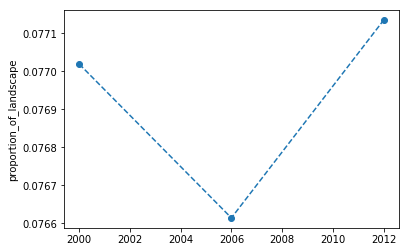

In [22]:
sta.plot_metric('proportion_of_landscape', class_val=1)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details, or [see above](available-metrics) the metrics that can be at each level.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

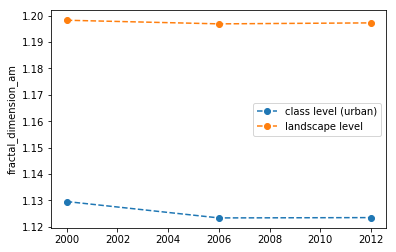

In [23]:
ax = sta.plot_metric('fractal_dimension_am', class_val=1, 
                     plt_kws={'label': 'class level (urban)'})
sta.plot_metric('fractal_dimension_am', ax=ax, plt_kws={'label': 'landscape level'})
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  `SpatioTemporalAnalysis.plot_metric` for more details.

#### Plotting multiple metrics

We can plot multiple metrics in a matplotlib axis grid through the `plot_metrics` method. For instance, we can plot all the metrics at the *urban* class level (`class_val` of 1) as in:

Text(0.5, 0.98, 'Class-level metrics (urban)')

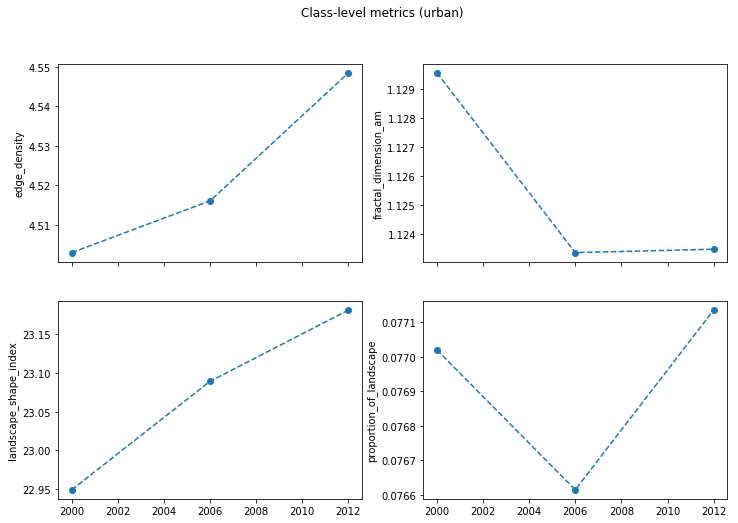

In [24]:
fig, axes = sta.plot_metrics(class_val=1, num_cols=2)
fig.suptitle('Class-level metrics (urban)')

We might also choose to plot only a subset of metrics by setting the `metrics` argument as in:

Text(0.5, 0.98, 'Class-level metrics (urban)')

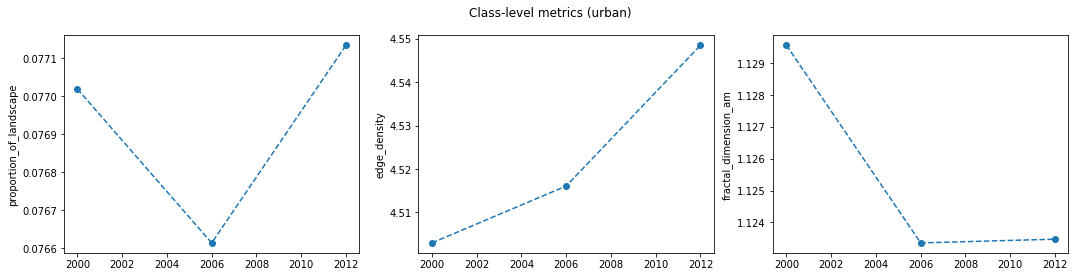

In [25]:
fig, axes = sta.plot_metrics(
    class_val=1,
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'],
    num_cols=3)
fig.suptitle('Class-level metrics (urban)')

In order to compute the metrics at the landscape level, we can still use `plot_metrics` but without setting the `class_val` argument:

Text(0.5, 0.98, 'Landscape-level metrics')

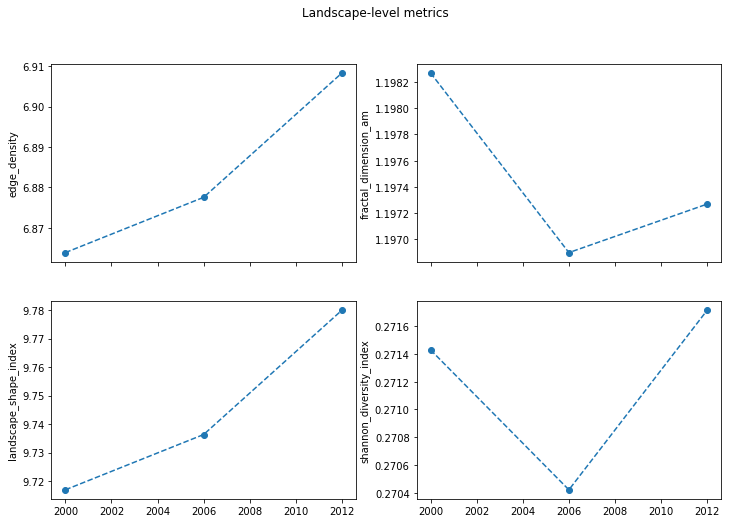

In [26]:
fig, axes = sta.plot_metrics(num_cols=2)
fig.suptitle('Landscape-level metrics')

See the documentation of `SpatioTemporalAnalysis.plot_metrics` for more details.